# EASE & ItemKNN with MSD Dataset and StrongGeneralization Scenario

In this notebook, the experiment of EASE & ItemKNN in RecPack will be presented. 
The notebook contains:

1. The 10% of MSD Dataset from RecPack and the StrongGeneralization Scenario has been used to split the data.
2. The StrongGeneralization Scenario to split the data.
3. The RecPack Pipeline Builder to run the experiments, including the splitted dataset, the algorithms and metrics to run. Hyperparameter has been performed in the Pipeline.

Please make sure you have installed all the latest libraries in your Python environment, in order to have a successful run of the code.

In [2]:
from recpack.datasets import Netflix, DummyDataset
from recpack.pipelines import PipelineBuilder
from recpack.scenarios import StrongGeneralization
from recpack.pipelines import ALGORITHM_REGISTRY
import pandas as pd

In [3]:
from recpack.datasets import MillionSongDataset
dataset = MillionSongDataset()

In [4]:
dataset.fetch_dataset()

In [5]:
dataset

In [30]:
df = dataset._load_dataframe()

## Datasets without Timestamps sampling

In [ ]:
# Count interactions per user and per song
user_interactions = df['userId'].value_counts().reset_index()
user_interactions.columns = ['userId', 'user_interactions']

song_interactions = df['songId'].value_counts().reset_index()
song_interactions.columns = ['songId', 'song_interactions']

# Merge the interaction counts back to the original dataframe
df = df.merge(user_interactions, on='userId')
df = df.merge(song_interactions, on='songId')

# Calculate a combined interaction score
df['interaction_score'] = df['user_interactions'] + df['song_interactions']

# Rank based on the interaction score
df['rank'] = df['interaction_score'].rank(method='first', ascending=False)

# Select the top 10%
filtered_df = df[df['rank'] <= len(df) * 0.1]

# Drop helper columns
filtered_df = filtered_df.drop(columns=['user_interactions', 'song_interactions', 'interaction_score', 'rank'])

In [29]:
filtered_df

,userId,songId
28,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0
59,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOMGIYR12AB0187973
60,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOMGIYR12AB0187973
61,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOMGIYR12AB0187973
62,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOMGIYR12AB0187973
...,...,...
138680210,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOOFYTN12A6D4F9B35
138680211,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOOFYTN12A6D4F9B35
138680212,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOOFYTN12A6D4F9B35
138680237,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUJVIT12A8C1451C1


In [24]:
df

,userId,songId,user_interactions,song_interactions,interaction_score,rank
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,142,6698,6840,55439149.0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,142,2012,2154,91117622.0
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,142,6383,6525,56840187.0
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,142,6383,6525,56840188.0
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,142,687,829,117735248.0
...,...,...,...,...,...,...
138680238,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUSMXX12AB0185C24,56,155529,155585,6266409.0
138680239,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOWYSKH12AF72A303A,56,3306,3362,77443084.0
138680240,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOWYSKH12AF72A303A,56,3306,3362,77443085.0
138680241,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOWYSKH12AF72A303A,56,3306,3362,77443086.0


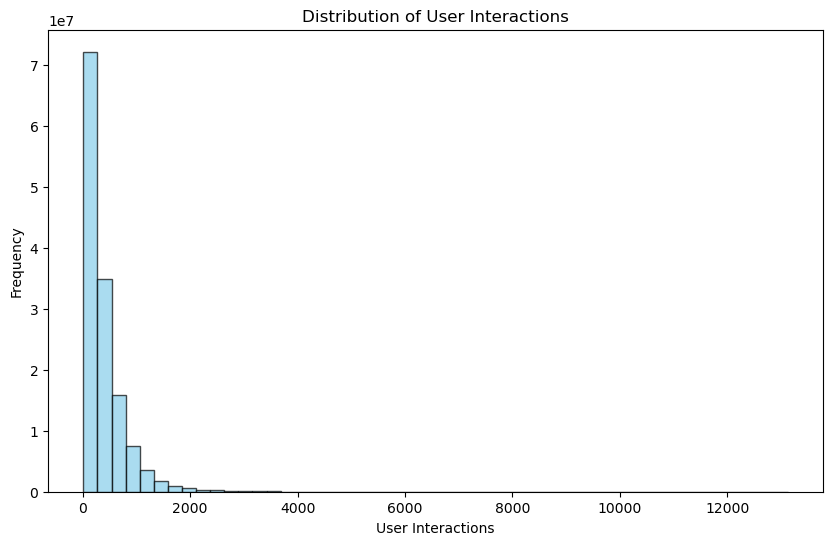

In [25]:
# Step 2: Create a histogram of the user_interactions
plt.figure(figsize=(10, 6))
plt.hist(df['user_interactions'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of User Interactions')
plt.xlabel('User Interactions')
plt.ylabel('Frequency')

# Step 3: Show the plot
plt.show()

In [25]:
filtered_df

,userId,songId
28,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0
59,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOMGIYR12AB0187973
60,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOMGIYR12AB0187973
61,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOMGIYR12AB0187973
62,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOMGIYR12AB0187973
...,...,...
138680210,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOOFYTN12A6D4F9B35
138680211,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOOFYTN12A6D4F9B35
138680212,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOOFYTN12A6D4F9B35
138680237,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUJVIT12A8C1451C1


In [12]:
from recpack.matrix import InteractionMatrix
from recpack.preprocessing.preprocessors import DataFramePreprocessor
item_ix = 'songId'
user_ix = 'userId'

preprocessor = DataFramePreprocessor(item_ix=item_ix, user_ix=user_ix)
interaction_matrix = preprocessor.process(filtered_df)

  0%|          | 0/13868024 [00:00<?, ?it/s]

  0%|          | 0/13868024 [00:00<?, ?it/s]

In [10]:
scenario = StrongGeneralization(frac_users_train=0.8, frac_interactions_in=0.8, validation=True)
scenario.split(interaction_matrix)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [11]:
pipeline_builder = PipelineBuilder()
ok = (scenario._validation_data_in, scenario._validation_data_out)
pipeline_builder.set_data_from_scenario(scenario)


# Add the baseline algorithms
pipeline_builder.add_algorithm('ItemKNN', grid={'K': [100, 200, 400, 800]})
pipeline_builder.add_algorithm('EASE', grid={'l2': [10, 100, 1000], 'alpha': [0, 0.1, 0.5]})

# Add NDCG, Recall, and HR metrics to be evaluated at 10, 20, and 50
pipeline_builder.add_metric('NDCGK', [10, 20, 50])
pipeline_builder.add_metric('RecallK', [10, 20, 50])
pipeline_builder.add_metric('HitK', [10, 20, 50])

# Set the optimisation metric
pipeline_builder.set_optimisation_metric('RecallK', 20)

# Construct pipeline
pipeline = pipeline_builder.build()

# Debugging: Output the shape of the training data
#print(f"Training data shape: {im.shape}")

# Run pipeline, will first do optimisation, and then evaluation
pipeline.run()

/opt/conda/lib/python3.11/site-packages/recpack/pipelines/pipeline_builder.py:145: UserWarning: Grid parameter for add_algorithm function will be deprecated in favour of optimisation_info.
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?it/s]

2024-08-06 19:56:40,550 - base - recpack - INFO - Fitting ItemKNN complete - Took 2.12s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:279: UserWarning: ItemKNN missing similar items for 6 items.
  warnings.warn(f"{self.name} missing similar items for {missing} items.")


2024-08-06 19:56:47,093 - base - recpack - INFO - Fitting ItemKNN complete - Took 1.54s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:279: UserWarning: ItemKNN missing similar items for 6 items.
  warnings.warn(f"{self.name} missing similar items for {missing} items.")


2024-08-06 19:56:52,411 - base - recpack - INFO - Fitting ItemKNN complete - Took 1.35s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:279: UserWarning: ItemKNN missing similar items for 6 items.
  warnings.warn(f"{self.name} missing similar items for {missing} items.")


2024-08-06 19:56:59,050 - base - recpack - INFO - Fitting ItemKNN complete - Took 1.71s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:279: UserWarning: ItemKNN missing similar items for 6 items.
  warnings.warn(f"{self.name} missing similar items for {missing} items.")


2024-08-06 19:57:06,307 - base - recpack - INFO - Fitting ItemKNN complete - Took 1.83s
2024-08-06 19:58:13,926 - base - recpack - INFO - Fitting EASE complete - Took 1.49s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:279: UserWarning: EASE missing similar items for 6 items.
  warnings.warn(f"{self.name} missing similar items for {missing} items.")


2024-08-06 19:58:19,896 - base - recpack - INFO - Fitting EASE complete - Took 1.45s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:279: UserWarning: EASE missing similar items for 6 items.
  warnings.warn(f"{self.name} missing similar items for {missing} items.")


2024-08-06 19:58:25,129 - base - recpack - INFO - Fitting EASE complete - Took 1.15s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:279: UserWarning: EASE missing similar items for 6 items.
  warnings.warn(f"{self.name} missing similar items for {missing} items.")


2024-08-06 19:58:30,522 - base - recpack - INFO - Fitting EASE complete - Took 1.03s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/ease.py:89: RuntimeWarning: divide by zero encountered in divide
  w = 1 / np.diag(XTX) ** self.alpha


2024-08-06 19:58:36,163 - base - recpack - INFO - Fitting EASE complete - Took 1.2s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/ease.py:89: RuntimeWarning: divide by zero encountered in divide
  w = 1 / np.diag(XTX) ** self.alpha


2024-08-06 19:58:41,687 - base - recpack - INFO - Fitting EASE complete - Took 1.08s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/ease.py:89: RuntimeWarning: divide by zero encountered in divide
  w = 1 / np.diag(XTX) ** self.alpha


2024-08-06 19:58:47,060 - base - recpack - INFO - Fitting EASE complete - Took 1.35s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/ease.py:89: RuntimeWarning: divide by zero encountered in divide
  w = 1 / np.diag(XTX) ** self.alpha


2024-08-06 19:58:52,676 - base - recpack - INFO - Fitting EASE complete - Took 1.15s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/ease.py:89: RuntimeWarning: divide by zero encountered in divide
  w = 1 / np.diag(XTX) ** self.alpha


2024-08-06 19:58:57,925 - base - recpack - INFO - Fitting EASE complete - Took 0.834s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/ease.py:89: RuntimeWarning: divide by zero encountered in divide
  w = 1 / np.diag(XTX) ** self.alpha


2024-08-06 19:59:04,163 - base - recpack - INFO - Fitting EASE complete - Took 1.91s


In [12]:
pipeline.get_metrics()

,NDCGK_10,NDCGK_20,NDCGK_50,RecallK_10,RecallK_20,RecallK_50,HitK_10,HitK_20,HitK_50
"ItemKNN(K=200,normalize_X=False,normalize_sim=False,pop_discount=None,similarity=cosine)",0.070357,0.079119,0.092743,0.086231,0.116829,0.17027,0.261241,0.359766,0.519183
"EASE(alpha=0,density=None,l2=1000)",0.078827,0.087685,0.099316,0.096104,0.127194,0.17294,0.291269,0.392233,0.528541
